In [1]:
import numpy as np 

from matplotlib import pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
from matplotlib.colors import ListedColormap 
import pickle as pkl

In [2]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter = 100, lr = 1e-2, bias=False, verbose=False, lamb=0.1):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.array([])
        # parameter
        self.theta = np.array([])
        self.lamb = lamb
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])

        self.theta = np.zeros(X.shape[1]).reshape((-1, 1))
        for _ in range(self.iter):
            self._gradient_descent(X, y)
            y_pred = self._logistic_hypothesis(X)
            self.loss = np.append(self.loss, self._loss_func(y_pred, y))
        return self
    
    # Problem 3
    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])


        return np.where(self._logistic_hypothesis(X) >=0.5, 1, 0)

       
    # Problem 3
    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])
        return self._logistic_hypothesis(X)
    
    def hypothesis(self, x):
        return x @ self.theta
    
    # problem 1
    def _logistic_hypothesis(self, x):
        y_pred = self.hypothesis(x)
        return 1/ (1 + np.exp(-y_pred))
    
    # problem 2
    def _gradient_descent(self, x, y):
        rows = x.shape[0]
        columns = x.shape[1]
        y_pred = self._logistic_hypothesis(x)
        for column in range(columns):
            gradient = 0
            for row in range(rows):
                gradient += (y_pred[row] - y[row]) * x[row, column]
            self.theta[column] = self.theta[column] - self.lr * ( gradient + self.lamb*self.theta[column])/rows
            
    # Problem 4
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lamb/(2 * y.shape[0])
        return loss

        


In [3]:
def decision_region(X,y,slr, xlabel="xlabe", ylabel="ylabel", label=[0, 1]):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    
    plt.title('decision region')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label=label[0])
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label=label[1])
    plt.legend()
    plt.show()

problem 5

In [4]:
iris = load_iris(as_frame=True)

features = iris.data
target = iris.target
data =pd.concat([features, target], axis=1)
features = ['sepal length (cm)', 'petal length (cm)']
target = iris.target.keys()
data = data[data["target"] != 2]
x_train, x_test, y_train, y_test = train_test_split(data[features], data["target"], test_size=0.2, random_state=0)

x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

Text(0, 0.5, 'Actual')

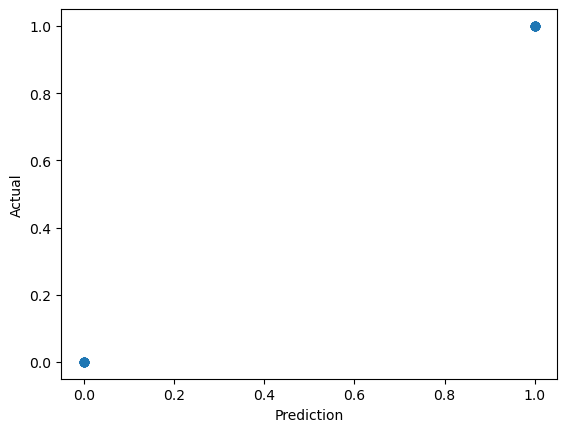

In [5]:
model = ScratchLogisticRegression(num_iter=500).fit(x_train, y_train)

pred = model.predict(x_test)
plt.scatter(pred, y_test)

plt.xlabel("Prediction")
plt.ylabel("Actual")

Problem 6

Text(0.5, 1.0, 'Loss curve')

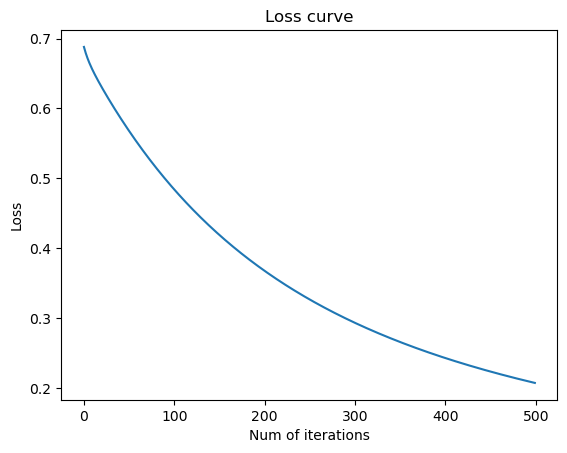

In [6]:
plt.plot(model.loss)
plt.xlabel("Num of iterations")
plt.ylabel("Loss")
plt.title("Loss curve")

Problem 7

(89170, 2)


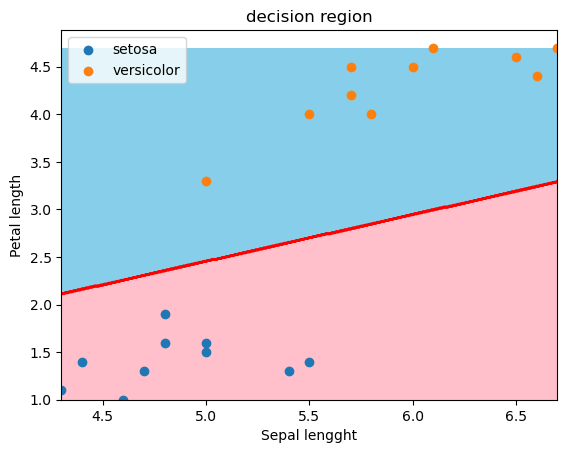

In [7]:
decision_region(x_test, y_test, model, "Sepal lengght", "Petal length", ['setosa' ,'versicolor'] )

problem 8

In [8]:
with open("model.pkl", "wb") as f:
    pkl.dump(model, f)

In [9]:
with open("test_data.npz", "wb") as f:
    np.savez(f, x_test=x_test, y_test=y_test)